In [1]:
#WordNet: Synonyms and Antonyms:

import nltk
from nltk.corpus import wordnet
nltk.download('wordnet')


def get_synonyms_antonyms(word):
    synonyms = []
    antonyms = []

    for x in wordnet.synsets(word):
        for lemma in x.lemmas():
            synonyms.append(lemma.name())
            if lemma.antonyms():
                antonyms.append(lemma.antonyms()[0].name())

    return set(synonyms), set(antonyms)

word = "joyful"
synonyms, antonyms = get_synonyms_antonyms(word)
print(f"Synonyms of '{word}': {synonyms}")
print(f"Antonyms of '{word}': {antonyms}")

[nltk_data] Downloading package wordnet to /root/nltk_data...


Synonyms of 'joyful': {'gleeful', 'joyful', 'jubilant', 'elated'}
Antonyms of 'joyful': {'sorrowful'}


In [2]:
#Word Similarity using WordNet:
nltk.download('wordnet_ic')

from nltk.corpus import wordnet

def word_similarity(word1, word2):
    synsets1 = wordnet.synsets(word1)
    synsets2 = wordnet.synsets(word2)

    max_similarity = 0
    for synset1 in synsets1:
        for synset2 in synsets2:
            similarity = synset1.path_similarity(synset2)
            if similarity is not None and similarity > max_similarity:
                max_similarity = similarity

    return max_similarity

word1 = "happy"
word2 = "joyful"
similarity = word_similarity(word1, word2)
print(f"Similarity between '{word1}' and '{word2}': {similarity}")


[nltk_data] Downloading package wordnet_ic to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet_ic.zip.


Similarity between 'happy' and 'joyful': 0.3333333333333333


In [3]:
from nltk.wsd import lesk
from nltk import word_tokenize
nltk.download('punkt')

sentence = "I saw a bat playing in the cave."
ambiguous_word = "bat"

best_sense = lesk(word_tokenize(sentence), ambiguous_word)
print(f"Best sense of '{ambiguous_word}' in the context: {best_sense}")


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Best sense of 'bat' in the context: Synset('cricket_bat.n.01')


In [5]:
import gensim.downloader as api

# Load pre-trained word vectors
word_vectors = api.load("glove-wiki-gigaword-100")

# Get vector for a specific word
word = "apple"
vector = word_vectors[word]
print(f"Vector for '{word}': {vector}")


[==================================================] 100.0% 128.1/128.1MB downloaded
Vector for 'apple': [-0.5985    -0.46321    0.13001   -0.019576   0.4603    -0.3018
  0.8977    -0.65634    0.66858   -0.49164    0.037557  -0.050889
  0.6451    -0.53882   -0.3765    -0.04312    0.51384    0.17783
  0.28596    0.92063   -0.49349   -0.48583    0.61321    0.78211
  0.19254    0.91228   -0.055596  -0.12512   -0.65688    0.068557
  0.55629    1.611     -0.0073642 -0.48879    0.45493    0.96105
 -0.063369   0.17432    0.9814    -1.3125    -0.15801   -0.54301
 -0.13888   -0.26146   -0.3691     0.26844   -0.24375   -0.19484
  0.62583   -0.7377     0.38351   -0.75004   -0.39053    0.091498
 -0.36591   -1.4715    -0.45228    0.2256     1.1412    -0.38526
 -0.06716    0.57288   -0.39191    0.31302   -0.29235   -0.96157
  0.15154   -0.21659    0.25103    0.096967   0.2843     1.4296
 -0.50565   -0.51374   -0.47218    0.32036    0.023149   0.22623
 -0.09725    0.82126    0.92599   -1.0086    -0.3

#Vector semantics in natural language processing (NLP) refers to the representation of words, phrases, sentences, or documents as vectors (i.e., numerical arrays) in a high-dimensional space. This approach is based on the distributional hypothesis, which posits that words that occur in similar contexts tend to have similar meanings. Vector semantics leverages this idea to capture semantic relationships between words by encoding their contextual usage in a numerical format. Following are some model examples

In [19]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from gensim.models import Word2Vec

# Sample text
text = '''NLTK is a powerful tool for natural language processing. It provides easy-to-use interfaces to over 50 corpora and lexical resources such as WordNet.'''

# Tokenization
tokens = word_tokenize(text.lower())

# Removing stopwords
stop_words = set(stopwords.words('english'))
filtered_tokens = [word for word in tokens if word not in stop_words]

# Lemmatization
lemmatizer = WordNetLemmatizer()
lemmatized_tokens = [lemmatizer.lemmatize(word) for word in filtered_tokens]




# Bag of Words (CountVectorizer) converts a collection of text documents into a matrix where each row corresponds to a document and each column corresponds to a word in the vocabulary. The value in each cell represents the frequency of the word's occurrence in the corresponding document.

In [22]:
from sklearn.feature_extraction.text import CountVectorizer

# Sample corpus of text documents
corpus = [
    'This is the first document.',
    'This document is the second document.',
    'And this is the third one.',
    'Is this the first document?',
]

# Create an instance of CountVectorizer
vectorizer = CountVectorizer()

# Fit the vectorizer to the corpus and transform the documents into a matrix of word counts
X = vectorizer.fit_transform(corpus)

# Get the feature names (vocabulary)
feature_names = vectorizer.get_feature_names_out()

# Print the matrix of word counts
print(X.toarray())

# Print the vocabulary
print(feature_names)


[[0 1 1 1 0 0 1 0 1]
 [0 2 0 1 0 1 1 0 1]
 [1 0 0 1 1 0 1 1 1]
 [0 1 1 1 0 0 1 0 1]]
['and' 'document' 'first' 'is' 'one' 'second' 'the' 'third' 'this']


#TF-IDF (Term Frequency-Inverse Document Frequency) is another popular technique for text representation in natural language processing (NLP). It calculates a numerical representation of each word in a document based on how frequently it appears in the document (TF) and how rare it is across all documents in the corpus (IDF). The TF-IDF score increases with the number of times a word appears in a document but is offset by the frequency of the word in the entire corpus.

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Sample corpus of text documents
corpus = [
    'This is the first document.',
    'This document is the second document.',
    'And this is the third one.',
    'Is this the first document?',
]

# Create an instance of TfidfVectorizer
vectorizer = TfidfVectorizer()

# Fit the vectorizer to the corpus and transform the documents into a TF-IDF matrix
X = vectorizer.fit_transform(corpus)

# Get the feature names (vocabulary)
feature_names = vectorizer.get_feature_names_out()

# Print the TF-IDF matrix
print(X.toarray())

# Print the vocabulary
print(feature_names)


[[0.         0.46979139 0.58028582 0.38408524 0.         0.
  0.38408524 0.         0.38408524]
 [0.         0.6876236  0.         0.28108867 0.         0.53864762
  0.28108867 0.         0.28108867]
 [0.51184851 0.         0.         0.26710379 0.51184851 0.
  0.26710379 0.51184851 0.26710379]
 [0.         0.46979139 0.58028582 0.38408524 0.         0.
  0.38408524 0.         0.38408524]]
['and' 'document' 'first' 'is' 'one' 'second' 'the' 'third' 'this']


#In Natural Language Processing (NLP), semantics refers to the meaning of words, phrases, and sentences. Traditionally, semantics has been approached using symbolic methods where meanings are represented explicitly through symbols or rules.

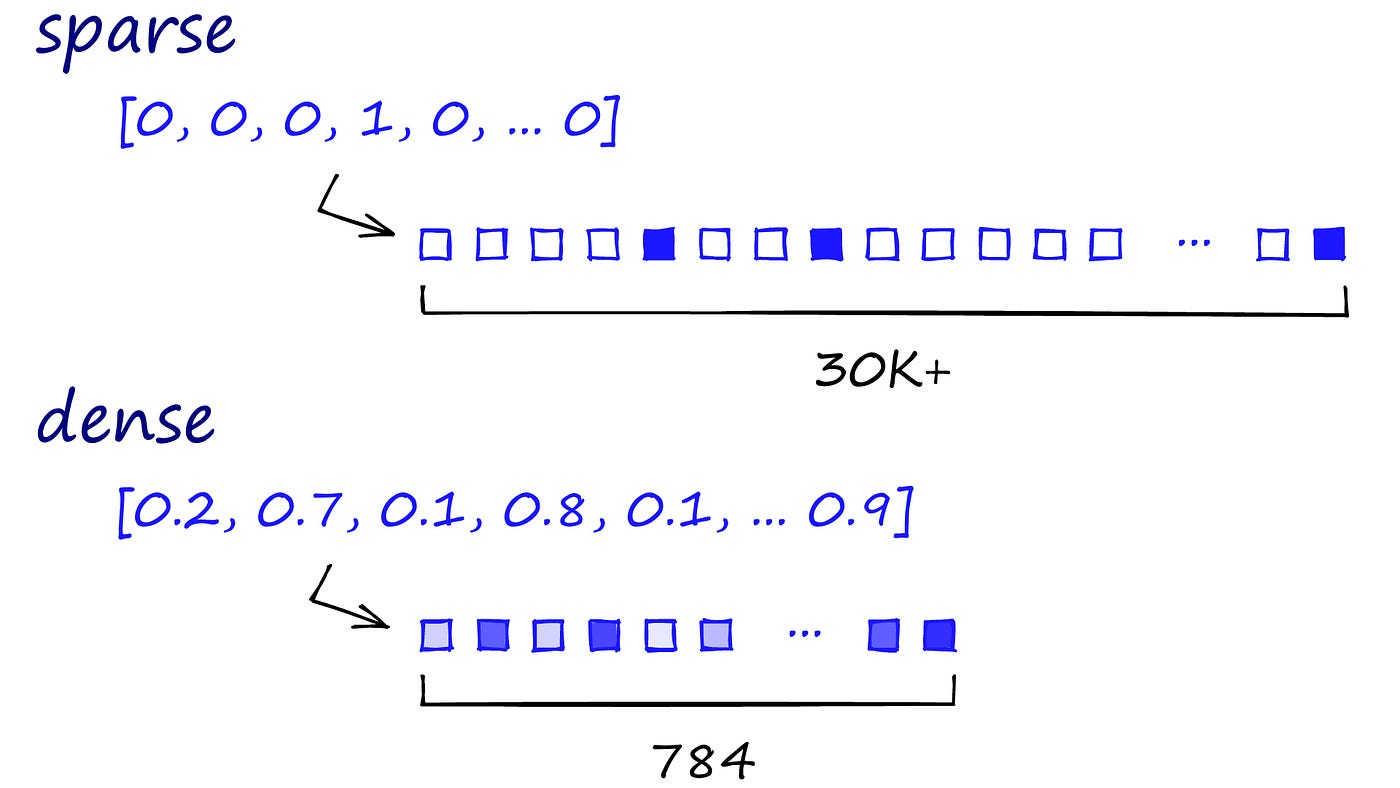

In [25]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from gensim.models import Word2Vec

# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

# Sample text for demonstration
text = "NLTK (Natural Language Toolkit) is a leading platform for building Python programs to work with human language data."

# Tokenize the text into words
tokens = word_tokenize(text.lower())  # Convert to lowercase for consistency
print("Tokenized Text:", tokens)

# Remove stopwords
stop_words = set(stopwords.words('english'))
filtered_tokens = [word for word in tokens if word not in stop_words]
print("Filtered Text:", filtered_tokens)



Tokenized Text: ['nltk', '(', 'natural', 'language', 'toolkit', ')', 'is', 'a', 'leading', 'platform', 'for', 'building', 'python', 'programs', 'to', 'work', 'with', 'human', 'language', 'data', '.']
Filtered Text: ['nltk', '(', 'natural', 'language', 'toolkit', ')', 'leading', 'platform', 'building', 'python', 'programs', 'work', 'human', 'language', 'data', '.']


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [26]:
# Train Word2Vec model
# You can adjust the parameters of Word2Vec according to your requirements
model = Word2Vec([filtered_tokens], min_count=1)

# Accessing word vectors
word_vectors = model.wv
print("Word Vectors for 'nltk':", word_vectors['nltk'])


Word Vectors for 'nltk': [ 7.6945643e-03  9.1179665e-03  1.1461526e-03 -8.3306553e-03
  8.4308358e-03 -3.6925043e-03  5.7434444e-03  4.3994165e-03
  9.6972389e-03 -9.3003642e-03  9.2044557e-03 -9.2900340e-03
 -6.9140904e-03 -9.1053955e-03 -5.5508125e-03  7.3640174e-03
  9.1669615e-03 -3.3222814e-03  3.7265189e-03 -3.6295487e-03
  7.8789080e-03  5.8699134e-03  3.0467484e-06 -3.6256260e-03
 -7.2246152e-03  4.7768345e-03  1.4445637e-03 -2.6058177e-03
  7.8358511e-03 -4.0413775e-03 -9.1550918e-03 -2.2549864e-03
  1.2645821e-04 -6.6405097e-03 -5.4914057e-03 -8.5076662e-03
  9.2245797e-03  7.4195517e-03 -2.9291856e-04  7.3694400e-03
  7.9521826e-03 -7.7854109e-04  6.6091521e-03  3.7670597e-03
  5.0704717e-03  7.2453488e-03 -4.7323308e-03 -2.1907822e-03
  8.6885621e-04  4.2409538e-03  3.3101565e-03  5.0889757e-03
  4.5890631e-03 -8.4455591e-03 -3.1831579e-03 -7.2387783e-03
  9.6796630e-03  5.0105010e-03  1.7888731e-04  4.1203527e-03
 -7.6658735e-03 -6.3004885e-03  3.0832158e-03  6.5373224e-03

In [27]:

# Finding similar words
similar_words = model.wv.most_similar('language')
print("Words similar to 'language':", similar_words)


Words similar to 'language': [('leading', 0.21617142856121063), ('natural', 0.09310103207826614), ('building', 0.09298894554376602), ('toolkit', 0.07963486760854721), (')', 0.06285078823566437), ('platform', 0.0270574688911438), ('python', 0.016134677454829216), ('.', -0.010772992856800556), ('work', -0.027754373848438263), ('nltk', -0.03762246295809746)]


Singular Value Decomposition (SVD) is a powerful tool in linear algebra that breaks down a matrix into more fundamental components. Here's a breakdown of what SVD does and why it's important:

What is SVD?

SVD essentially factorizes a matrix, say  A, into three other matrices:

1.    U: An orthogonal matrix (columns are perpendicular and all have a magnitude of 1). This rotates the data again after the stretching/shrinking.
2.   Σ (Sigma): A diagonal matrix containing the singular values of A. These singular values represent the magnitude of the effect of A on data. This stretches or shrinks the data along specific axes, determined by the singular values.
3.    Vᵀ : Another orthogonal matrix (similar properties to U). This rotates the data like a compass needle.

The resulting equation looks like this: A = UΣVᵀ



In [30]:
import numpy as np
from sklearn.decomposition import TruncatedSVD

# Sample data matrix (4x5)
data = np.array([
    [1, 2, 3, 4, 5],
    [6, 7, 8, 9, 10],
    [11, 12, 13, 14, 15],
    [16, 17, 18, 19, 20]
])

# Perform Singular Value Decomposition (SVD) for dimensionality reduction
n_components = 2
svd = TruncatedSVD(n_components=n_components)
svd.fit(data)

# Transform the original data to reduced dimensionality
reduced_data = svd.transform(data)

# Print the transformed data and singular values
print("Original data:")
print(data)
print("\nReduced data:")
print(reduced_data)


Original data:
[[ 1  2  3  4  5]
 [ 6  7  8  9 10]
 [11 12 13 14 15]
 [16 17 18 19 20]]

Reduced data:
[[ 7.00239617  2.44263134]
 [18.12130112  1.27218153]
 [29.24020606  0.10173171]
 [40.35911101 -1.06871811]]


In [31]:
import nltk
import numpy as np
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD

# Sample documents
documents = [
    "This is the first document.",
    "This document is the second document.",
    "And this is the third one.",
    "Is this the first document?",
]

# Tokenization and preprocessing
def preprocess(document):
    lemmatizer = WordNetLemmatizer()
    tokens = word_tokenize(document.lower())
    tokens = [token for token in tokens if token.isalnum()]
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return ' '.join(tokens)

preprocessed_documents = [preprocess(doc) for doc in documents]

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(stop_words=stopwords.words('english'))
tfidf_matrix = tfidf_vectorizer.fit_transform(preprocessed_documents)

# Singular Value Decomposition
n_components = 2  # Set the number of components for dimensionality reduction
svd = TruncatedSVD(n_components=n_components)
svd_matrix = svd.fit_transform(tfidf_matrix)

# Printing singular values and components

print("\n SVD Components:")
print(svd.components_)



 SVD Components:
[[ 7.49462913e-01  6.36044797e-01 -1.55362238e-17  1.83718152e-01
  -1.36759550e-17]
 [ 5.88981227e-17 -1.43174552e-16  7.07106781e-01  9.94788100e-17
   7.07106781e-01]]


#Latent Semantic Analysis (LSA) is a technique used in natural language processing (NLP) to understand the relationships between words and the ideas they represent in a collection of documents. It goes beyond just matching keywords and instead tries to capture the underlying meaning  by  considering how words are used in context.

In [34]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD

# Sample documents
documents = [
    "The cat sat on the mat",
    "The dog jumped over the fence",
    "The cat and dog are friends",
    "The bird sang a beautiful song"
]

# Tokenize and preprocess documents
stop_words = set(stopwords.words('english'))
preprocessed_documents = []
for doc in documents:
    tokens = word_tokenize(doc)
    filtered_tokens = [word.lower() for word in tokens if word.isalnum() and word.lower() not in stop_words]
    preprocessed_documents.append(' '.join(filtered_tokens))

# TF-IDF vectorization
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(preprocessed_documents)

# Apply LSA
lsa = TruncatedSVD(n_components=2)
lsa_matrix = lsa.fit_transform(tfidf_matrix)
lsa_matrix

array([[ 5.83630463e-01,  7.07106781e-01],
       [ 5.83630463e-01, -7.07106781e-01],
       [ 8.25378116e-01, -1.94289029e-16],
       [-1.79556180e-16,  2.64246977e-17]])

In [35]:

# Print the topics
print("LSA Topics:")
terms = vectorizer.get_feature_names_out()
for i, component in enumerate(lsa.components_):
    top_terms = [terms[j] for j in component.argsort()[:-6:-1]]
    print(f"Topic {i+1}: {', '.join(top_terms)}")



LSA Topics:
Topic 1: dog, cat, friends, jumped, fence
Topic 2: sat, mat, cat, bird, song


In [36]:
# Print document-topic matrix
print("\nDocument-Topic Matrix:")
for i, doc in enumerate(documents):
    print(f"Document {i+1}: {lsa_matrix[i]}")



Document-Topic Matrix:
Document 1: [0.58363046 0.70710678]
Document 2: [ 0.58363046 -0.70710678]
Document 3: [ 8.25378116e-01 -1.94289029e-16]
Document 4: [-1.79556180e-16  2.64246977e-17]


#Skip-gram is a method used to learn word embeddings in natural language processing (NLP). Word embeddings are dense vector representations of words in a continuous vector space, where similar words are mapped to nearby points.

In [38]:
import nltk
from nltk.corpus import brown
from nltk.tokenize import word_tokenize
from gensim.models import Word2Vec
from itertools import chain

# Download the Brown corpus (you might need to do this if you haven't already)
nltk.download('brown')

# Load the Brown corpus
sentences = brown.sents()

# Flatten the list of sentences into a single list of words
words = list(chain.from_iterable(sentences))

# Train the Skip-gram model
model = Word2Vec(sentences=sentences, vector_size=100, window=5, sg=1, min_count=5)

# Save the trained model
model.save("skipgram_model")

# Get the embedding vector for a word
word = "computer"
embedding_vector = model.wv[word]
print(f"Embedding vector for '{word}': {embedding_vector}")


[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!


Embedding vector for 'computer': [ 2.49854699e-01  1.30437270e-01  1.70395955e-01 -1.01156890e-01
 -9.74991079e-03 -1.53652117e-01  1.38173670e-01  2.64300704e-01
 -1.02317527e-01 -9.89147052e-02  8.50706324e-02 -1.85638398e-01
  1.56739384e-01  1.20465485e-02  1.05194688e-01 -8.27258974e-02
  1.16981044e-02 -1.48915559e-01  1.44856861e-02 -2.12420866e-01
  1.56990036e-01  7.29539692e-02  1.86673895e-01  7.44660422e-02
 -9.62188020e-02 -4.29131603e-03 -6.34378716e-02 -9.53450650e-02
 -6.97020367e-02  8.69383812e-02  2.47498468e-01 -1.01545103e-01
  1.59118429e-01 -2.06857488e-01 -6.96177920e-03  1.13676846e-01
 -1.03337064e-01 -3.71414013e-02 -1.41453445e-01 -1.79707229e-01
 -3.38659137e-02 -1.71413124e-01  6.01631477e-02  4.71751280e-02
  2.46396974e-01 -2.70051081e-02 -3.86386625e-02  3.42518725e-02
  3.25383246e-03  1.29848883e-01  1.05441779e-01 -6.42332807e-02
 -1.88736051e-01 -1.82428956e-01 -3.97036262e-02 -2.10067883e-01
  8.30916986e-02  3.01116295e-02  1.72498487e-02 -2.76202

In [41]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from gensim.models import Word2Vec

# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

# Sample sentences
sentences = [
    "I enjoy playing football with my friends",
    "Football is a popular sport worldwide",
    "Messi is one of the greatest football players",
    "I love to watch football matches"
]

# Tokenize sentences and remove stopwords
stop_words = set(stopwords.words('english'))
tokenized_sentences = [word_tokenize(sentence.lower()) for sentence in sentences]
filtered_sentences = [[word for word in sentence if word not in stop_words] for sentence in tokenized_sentences]

# Train Word2Vec model
model = Word2Vec(filtered_sentences, vector_size=100, window=5, min_count=1, sg=1)  # sg=1 for Skip-gram

# Get the word vector for a word
word_vector = model.wv['football']
print("Vector representation of 'football':", word_vector)


Vector representation of 'football': [-5.3622725e-04  2.3643136e-04  5.1033497e-03  9.0092728e-03
 -9.3029495e-03 -7.1168090e-03  6.4588725e-03  8.9729885e-03
 -5.0154282e-03 -3.7633716e-03  7.3805046e-03 -1.5334714e-03
 -4.5366134e-03  6.5540518e-03 -4.8601604e-03 -1.8160177e-03
  2.8765798e-03  9.9187379e-04 -8.2852151e-03 -9.4488179e-03
  7.3117660e-03  5.0702621e-03  6.7576934e-03  7.6286553e-04
  6.3508903e-03 -3.4053659e-03 -9.4640139e-04  5.7685734e-03
 -7.5216377e-03 -3.9361035e-03 -7.5115822e-03 -9.3004224e-04
  9.5381187e-03 -7.3191668e-03 -2.3337686e-03 -1.9377411e-03
  8.0774371e-03 -5.9308959e-03  4.5162440e-05 -4.7537340e-03
 -9.6035507e-03  5.0072931e-03 -8.7595852e-03 -4.3918253e-03
 -3.5099984e-05 -2.9618145e-04 -7.6612402e-03  9.6147433e-03
  4.9820580e-03  9.2331432e-03 -8.1579173e-03  4.4957981e-03
 -4.1370760e-03  8.2453608e-04  8.4986202e-03 -4.4621765e-03
  4.5175003e-03 -6.7869602e-03 -3.5484887e-03  9.3985079e-03
 -1.5776526e-03  3.2137157e-04 -4.1406299e-03 -7

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [42]:
# Find similar words
similar_words = model.wv.most_similar('football', topn=5)
print("Words similar to 'football':", similar_words)


Words similar to 'football': [('sport', 0.2161792665719986), ('playing', 0.09310110658407211), ('messi', 0.09292184561491013), ('friends', 0.07963486760854721), ('popular', 0.06285078823566437)]


In [43]:
#Word Sense

In [44]:
import nltk
from nltk.wsd import lesk
from nltk.tokenize import word_tokenize

# Sample sentence with ambiguous word
sentence = "He went to the bank to deposit his money."

# Tokenize the sentence
tokens = word_tokenize(sentence)

# Specify the ambiguous word and its POS (Part of Speech)
ambiguous_word = "bank"
pos = "n"  # 'n' for noun in this case

# Use the Lesk algorithm for Word Sense Disambiguation
sense = lesk(tokens, ambiguous_word, pos)

# Print the result
print(f"Word: {ambiguous_word}")
print(f"Sense: {sense.name()}")
print(f"Definition: {sense.definition()}")


Word: bank
Sense: savings_bank.n.02
Definition: a container (usually with a slot in the top) for keeping money at home


In [46]:
import nltk
from nltk.corpus import wordnet as wn

# Function to print the synset tree recursively
def print_synset_tree(synset, indent=0):
    print(' ' * indent + synset.name().split(".")[0])  # Print only the word part of the synset
    for hypernym in synset.hypernyms():
        print_synset_tree(hypernym, indent + 4)

# Example word
word = "car"

# Get synsets for the word
synsets = wn.synsets(word)

# Select the first synset (you can adjust this as needed)
if synsets:
    synset = synsets[0]
else:
    print("No synsets found for", word)
    exit()

# Print the synset tree
print("Hypernym Hierarchy for '{}'".format(word))
print_synset_tree(synset)


Hypernym Hierarchy for 'car'
car
    motor_vehicle
        self-propelled_vehicle
            wheeled_vehicle
                container
                    instrumentality
                        artifact
                            whole
                                object
                                    physical_entity
                                        entity
                vehicle
                    conveyance
                        instrumentality
                            artifact
                                whole
                                    object
                                        physical_entity
                                            entity


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


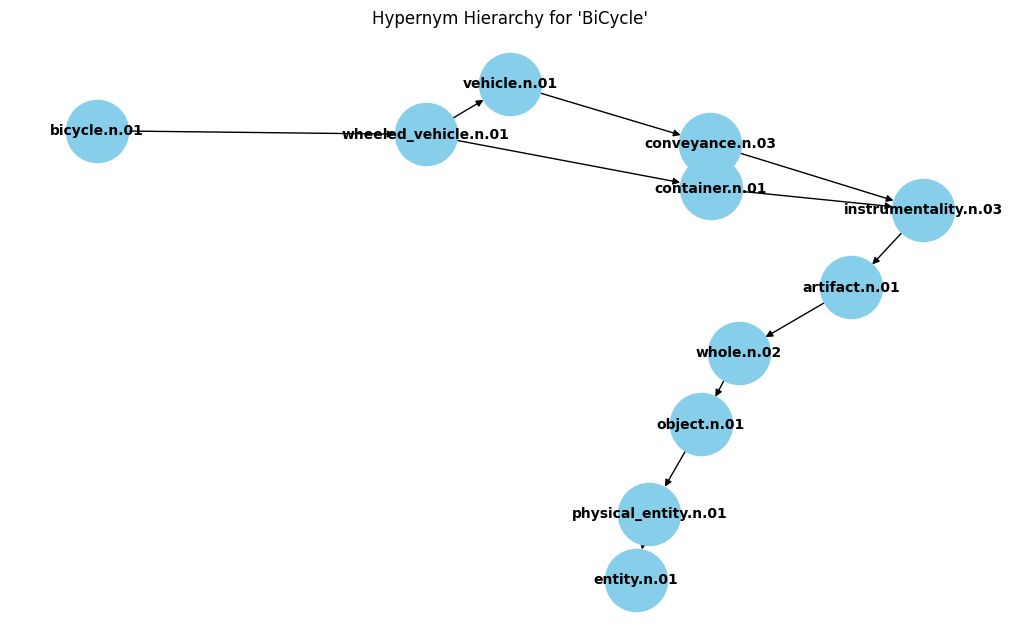

In [47]:
import nltk
from nltk.corpus import wordnet as wn
import networkx as nx
import matplotlib.pyplot as plt
nltk.download('wordnet')

# Function to build a directed graph from WordNet synsets
def build_graph(synset):
    G = nx.DiGraph()
    for hypernym in synset.hypernyms():
        G.add_edge(synset.name(), hypernym.name())
        G = nx.compose(G, build_graph(hypernym))
    return G

# Example word
word = "BiCycle"

# Get synsets for the word
synsets = wn.synsets(word)

# Select the first synset (you can adjust this as needed)
if synsets:
    synset = synsets[0]
else:
    print("No synsets found for", word)
    exit()

# Build the graph
G = build_graph(synset)

# Draw the graph
plt.figure(figsize=(10, 6))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=2000, node_color="skyblue", font_size=10, font_weight="bold")
plt.title("Hypernym Hierarchy for '{}'".format(word))
plt.show()
